# TP5

Yaël Tramier (yael.tramier@etu.univ-cotedazur.fr)<br/>
Robin Viollet (robin.viollet@etu.univ-cotedazur.fr)

Polytech SI3 - SSII - 2021-22

Nous avons 2 classes: cuillère et fromage<br/>
Dans la classe cuillère et fromage respectivement, nous avons 15 et 25 échantillons de personnes à chaque fois différentes.<br/>
L'enregistrement se faisait par groupe de personnes. Nous avons par la suite découpé ces sons pour les isoler.

## Classification par la moyenne des MFCCs

In [1]:
#les imports nécessaires pour la suite
import matplotlib.pyplot as plt
import numpy as np 
import librosa
import librosa.display
import IPython.display as ipd
import glob
print(librosa.__version__)

0.9.1


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
# une fonction pour dessiner chronogramme, spectre et spectrogramme
def plotCSS(signal, te):
    fe = 1/te
    n = len(signal)
    t = np.linspace(0, n*te, n,endpoint=False)
    tf = np.fft.rfftfreq(n, te)
    # afficher chronogramme, spectre et spectrogramme
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 5))
    # chronogramme
    ax1.plot(t, signal)
    ax1.set_xlabel('temps (s)')
    ax1.set_ylabel('amplitude')
    ax1.set_title("chronogramme")
    #spectre
    ax2.plot(tf,np.abs(np.fft.rfft(signal)))
    ax2.set_xlabel('fréquence (Hz)')
    ax2.set_ylabel('module de la TF')
    ax2.set_title("spectre")
    #spectrogramme
    S = np.abs(librosa.stft(signal))
    Sdb = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(Sdb, sr=fe, x_axis='time', y_axis='hz')
    ax3.set_xlabel('temps (s)')
    ax3.set_ylabel('fréquence (Hz)')
    ax3.set_title("spectrogramme")
    plt.show()  

## Les données
On va utiliser le jeu de données <a href="https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html">"speech commands"</a> que vous devez <a href="http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz">télécharger</a>.

In [4]:
basedir="sons/"
# à adapter à votre chemin de sons
#attention, sous windows, il faut changer en "C:\\Users\\monNom\\monCoursPrefere\\"
classes = ["cuillère", "fromage"] #vous pouvez modifier ou ajouter d'autres classes du jeu de données

In [5]:
for cl in classes:
    listSons = glob.glob(basedir + "/"+ cl + "*.ogg")
    print(len(listSons), "sons de la classe ", cl)

14 sons de la classe  cuillère
25 sons de la classe  fromage


### On commence avec un seul son (au choix)
Charger le son, afficher le et écoutez le. A quelle fréquence est-il échantillonné ?

In [6]:
y, sr = librosa.load(listSons[0])

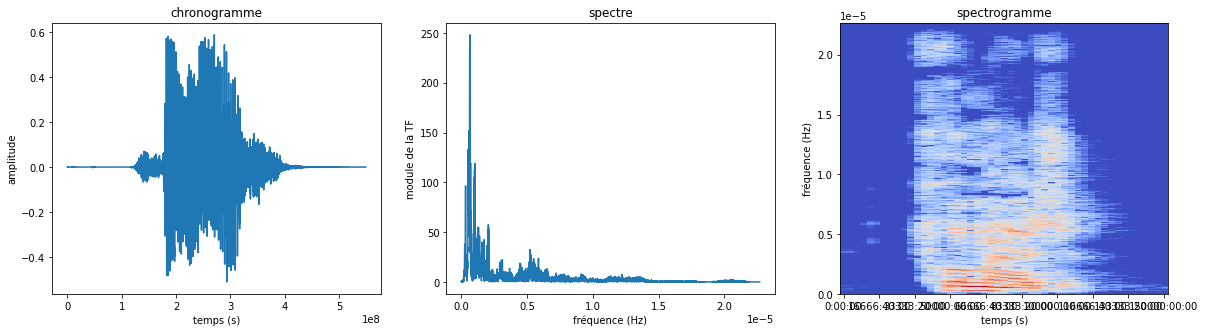

In [7]:
plotCSS(y,sr)

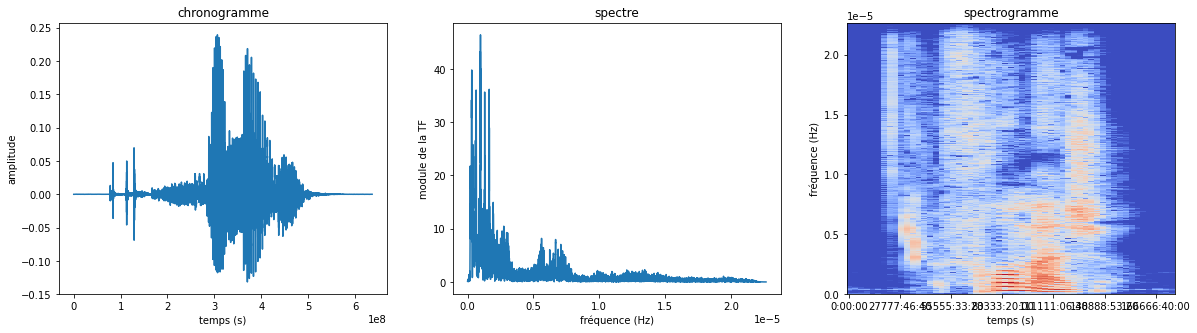

In [8]:
y, sr = librosa.load(listSons[1])
plotCSS(y,sr)

In [9]:
# écoutons 
ipd.Audio(y,rate=sr,autoplay=True)

### Calcul des MFCCs du son

In [10]:
mfccFeatures = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)

In [11]:
mfccFeatures.shape

(13, 57)

In [12]:
len(y)

28871

In [13]:
print("avec les MFCCs, on peut décrire un son par ", mfccFeatures.shape[0]*mfccFeatures.shape[1], " valeurs au lieu de ", len(y))

avec les MFCCs, on peut décrire un son par  741  valeurs au lieu de  28871


In [14]:
print("ou même par bien moins en prenant la moyenne des MFCC:\n", np.mean(mfccFeatures,axis=1))

ou même par bien moins en prenant la moyenne des MFCC:
 [-453.26257      41.089718    -11.212513     15.008807     -6.0089145
   -3.4704046     0.98946995    4.8760824   -20.783136      3.622818
   -0.8422929     0.8833297    -3.427363  ]


## Calcul des MFCCs de tous les sons

### On va partir d'une base de 20 sons de chaque classe

In [15]:
nb=14
nbMFCCtotal = 0
verbose = True

for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    for s in listSons[:nb]:
        if verbose:
            print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        if verbose:
            print("MFCC: ", mfcc_feat.shape, "longueur du son : ", len(sig))
        nbMFCCtotal += mfcc_feat.shape[1]


### sons/cuillère-12.ogg ###
MFCC:  (13, 31) longueur du son :  15729
### sons/cuillère-06.ogg ###
MFCC:  (13, 49) longueur du son :  24890
### sons/cuillère-04.ogg ###
MFCC:  (13, 45) longueur du son :  22842
### sons/cuillère-13.ogg ###
MFCC:  (13, 37) longueur du son :  18434
### sons/cuillère-03.ogg ###
MFCC:  (13, 45) longueur du son :  22842
### sons/cuillère-09.ogg ###
MFCC:  (13, 45) longueur du son :  22842
### sons/cuillère-07.ogg ###
MFCC:  (13, 41) longueur du son :  20794
### sons/cuillère-08.ogg ###
MFCC:  (13, 46) longueur du son :  23474
### sons/cuillère-10.ogg ###
MFCC:  (13, 46) longueur du son :  23226
### sons/cuillère-01.ogg ###
MFCC:  (13, 61) longueur du son :  30870
### sons/cuillère-02.ogg ###
MFCC:  (13, 42) longueur du son :  21477
### sons/cuillère-05.ogg ###
MFCC:  (13, 49) longueur du son :  24890
### sons/cuillère-14.ogg ###
MFCC:  (13, 29) longueur du son :  14789
### sons/cuillère-11.ogg ###
MFCC:  (13, 46) longueur du son :  23491
### sons/fromage-06.

En fonction des longueur des sons, on n'obtient pas le même nombre de MFCCs. Comment comparer 2 sons qui ne sont pas décrits par le même nombre de valeurs ? Une solution serait de réduire les longueurs à la plus petite des longueurs mais on risque de perdre une partie importante du son. Et si un nouveau son était plus petit ? Une autre solution serait de combler les sons plus petits par du silence au risque d'avoir une ressemblance entre les sons contenant plus de silence.

Pour un premier test, on va utiliser la moyenne de tous les MFCCs d'un son pour le représenter. Un son sera ainsi représenté par 13 coefficients.

In [16]:
lesMfcc = np.empty(shape=(nb*len(classes), 13), dtype=float) 
verbose=False

i=0
for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    for s in listSons[:nb]:
        if verbose:
            print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        if verbose:
            print("MFCC: ", mfcc_feat.shape, "len : ", len(sig))
        lesMfcc[i] = np.mean(mfcc_feat, axis=1)
        i += 1

print("shape : ",lesMfcc.shape)


shape :  (28, 13)


### Classification linéaire des sons

Il ne reste plus que l'étape de classification des sons. On va utiliser pour cela une méthode simple de classification linéaire: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">la régression logistique</a>.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# création de l'objet de regression logistique
logisticRegr = LogisticRegression()

# classes des sons:
yTrain = []
for clNumber in range(len(classes)):
    yTrain += [clNumber]*nb

# apprentissage de la séparation en utilisation des données pour lesquelles on connait la classe
logisticRegr.fit(lesMfcc, yTrain)


/run/media/etan-ht2/polytech/S6/SSII/ssiienv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Un message vous prévient-il d'un problème sur les données ? On va normaliser les données

In [19]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(lesMfcc)

print(scaler.mean_)
print(scaler.scale_)

xTrain = scaler.transform(lesMfcc)

[-3.91827215e+02  8.19450754e+01 -6.50272800e+00  2.72751743e+01
  8.74842178e+00 -2.23726711e+00 -1.15126398e+00 -3.25940769e-01
 -5.35005750e+00  1.75174819e+00 -3.95980859e+00 -1.68741243e+00
 -1.02258981e+00]
[76.41457984 21.31435957 15.18262301 11.02407818 16.06573483  7.54802277
  9.47436043  5.12662188  6.93362833  5.729719    7.35649871  6.2963681
  4.86634303]


In [20]:
logisticRegr.fit(xTrain, yTrain)

LogisticRegression()

Sommes-nous satisfait du résultat ?

In [21]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
ypred = logisticRegr.predict(xTrain)
print("train F1 score = ", f1_score(yTrain, ypred, average = 'micro'))
print("train accuracy score = ", accuracy_score(yTrain, ypred))


train F1 score =  1.0
train accuracy score =  1.0


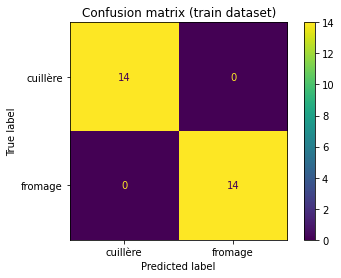

In [23]:
cm = confusion_matrix(yTrain, ypred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.set_title('Confusion matrix (train dataset)')
plt.show()

Ce ne pas de la triche de regarder les performances sur les données que nous avons utilisées pour construire le classifieur ?

### Evaluation de la classification

Pour évaluer de façon juste, on va utiliser des sons qui n'ont pas déjà servi à l'apprentissage. On va par exemple prendre les nb derniers de chaque classe.

In [24]:
# Calculer nb MFCCs

nb_mfcc = 0

for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    for s in listSons[-nb:]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        nb_mfcc += mfcc_feat.shape[1]

print(nb_mfcc)

1334


In [25]:
lesMfccTest = np.empty(shape=(nb*len(classes), 13), dtype=float) 
verbose=False

i=0
for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    for s in listSons[-nb:]:
        if verbose:
            print("###",s,"###")
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        if verbose:
            print("MFCC: ", mfcc_feat.shape, "len : ", len(sig))
        lesMfccTest[i] = np.mean(mfcc_feat, axis=1)
        i += 1

if verbose:
    print("shape : ",lesMfccTest.shape)
    
xTest = scaler.transform(lesMfccTest)
yTest = []
for clNumber in range(len(classes)):
    yTest += [clNumber]*nb

In [26]:
predTest = logisticRegr.predict(xTest)
print("test F1 score = ", f1_score(yTest, predTest, average = 'micro'))
print("test accuracy score = ", accuracy_score(yTest, predTest))


test F1 score =  0.9642857142857143
test accuracy score =  0.9642857142857143


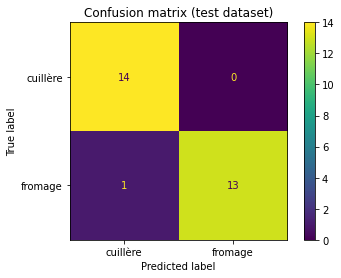

In [27]:
cm = confusion_matrix(yTest, predTest, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.set_title('Confusion matrix (test dataset)')
plt.show()

Essayez d'améliorer les résultats en augmentant le nombre de sons par classes ou en modifiant la représentation des sons.

Essayez également d'autres classes du jeu de données.

Nous avons lors de la phase d'apprentissage :
- Score F1: 1.0
- Accuracy score = 1.0

Nous avons lors de la phase de test :
- Score F1: 0.96
- Accuracy score = 0.96

## Classification par cluster

In [28]:
import librosa
from sklearn.cluster import KMeans
s,fe=librosa.load("sons/fromage-01.ogg")
lesMfcc = librosa.feature.mfcc(y=s, sr=fe, n_mfcc=13)
lesMfcc = lesMfcc.transpose()
k = 10
kmeans1 = KMeans(n_clusters=k, init='k-means++', n_init=10)
kmeans1.fit(lesMfcc)
nouvMfcc= [0.4, -10.1, -30.8, -3.5, -15.0, -15.9, 4.7, 3.6, -9.6, 3.3, 36.5, 4.6, -3.0]
quelCluster = kmeans1.predict(lesMfcc)
print('nouveau MFCC dans cluster :', quelCluster)

nouveau MFCC dans cluster : [1 1 1 1 1 1 1 1 1 1 1 3 9 6 6 6 6 6 8 8 8 8 8 0 0 0 2 2 2 9 9 9 5 5 5 5 5
 6 6 6 6 4 4 4 4 4 4 3 3 3 7 7 7 1 1 1 1 1 1 1 1]


In [34]:
# Calculer nb MFCCs

nb_mfcc = 0

for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    nb = int(len(listSons) * 0.6)
    for s in listSons[:nb]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        nb_mfcc += mfcc_feat.shape[1]

print(nb_mfcc)

1049


In [35]:
dimSons = []

i = 0
j = 0

print(nb_mfcc)

lesMfcc = np.empty(shape=(nb_mfcc, 13), dtype=float)

# Compter le nombre de MFCC total
#boucle sur tous les sons : compter le nombre de MFCC
for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    nb = int(len(listSons) * 0.6)
    for s in listSons[:nb]:
        
#Allouer la m ́emoire n ́ecessaire :

        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        nbl = mfcc_feat.shape[1]
        dimSons.append(nbl)
        print(mfcc_feat.shape)
        print(s)
        
        #Remplir les lignes n ́ecessaires :
        print('j  = %d' % j)
        print("nbl = %d" % nbl)
        print("len lesMfcc[j:j+nbl] %d" % len(lesMfcc[j:j+nbl]))
        print("len mfcc_feat %d" % len(mfcc_feat))
        lesMfcc[j:j+nbl]=mfcc_feat.transpose()
        
        i = i + 1
        j = j + nbl

1049
(13, 31)
sons/cuillère-12.ogg
j  = 0
nbl = 31
len lesMfcc[j:j+nbl] 31
len mfcc_feat 13
(13, 49)
sons/cuillère-06.ogg
j  = 31
nbl = 49
len lesMfcc[j:j+nbl] 49
len mfcc_feat 13
(13, 45)
sons/cuillère-04.ogg
j  = 80
nbl = 45
len lesMfcc[j:j+nbl] 45
len mfcc_feat 13
(13, 37)
sons/cuillère-13.ogg
j  = 125
nbl = 37
len lesMfcc[j:j+nbl] 37
len mfcc_feat 13
(13, 45)
sons/cuillère-03.ogg
j  = 162
nbl = 45
len lesMfcc[j:j+nbl] 45
len mfcc_feat 13
(13, 45)
sons/cuillère-09.ogg
j  = 207
nbl = 45
len lesMfcc[j:j+nbl] 45
len mfcc_feat 13
(13, 41)
sons/cuillère-07.ogg
j  = 252
nbl = 41
len lesMfcc[j:j+nbl] 41
len mfcc_feat 13
(13, 46)
sons/cuillère-08.ogg
j  = 293
nbl = 46
len lesMfcc[j:j+nbl] 46
len mfcc_feat 13
(13, 49)
sons/fromage-06.ogg
j  = 339
nbl = 49
len lesMfcc[j:j+nbl] 49
len mfcc_feat 13
(13, 57)
sons/fromage-18.ogg
j  = 388
nbl = 57
len lesMfcc[j:j+nbl] 57
len mfcc_feat 13
(13, 50)
sons/fromage-04.ogg
j  = 445
nbl = 50
len lesMfcc[j:j+nbl] 50
len mfcc_feat 13
(13, 45)
sons/fromage-0

In [88]:
nbMFCCtesttotal = 0

for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    nb = int(len(listSons) * 0.6)
    nb_app = int(len(listSons) * 0.6)
    nb_test = int(len(listSons) * 0.4)
    for s in listSons[nb_app:nb_app+nb_test]:
        (sig,rate) = librosa.load(s)
        mfcc_feat = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13)
        nbMFCCtesttotal += mfcc_feat.shape[1]

In [91]:
k = 5

kmeans1 = KMeans(n_clusters=k, init='k-means++', n_init=10)
kmeans1.fit(lesMfcc)

bofs = np.empty(shape=(len(classes)*nb,k),dtype=int)

lesMfcctest = np.empty(shape=(nbMFCCtesttotal, 13), dtype=float)

j = 0

for cl in classes:
    listSons = glob.glob(basedir+"/"+cl+"*.ogg")
    nb = int(len(listSons) * 0.6)
    nb_app = int(len(listSons) * 0.6)
    nb_test = int(len(listSons) * 0.4)
    for s in listSons[nb_app:nb_app+nb_test]:
        print(s)
        (sig,rate) = librosa.load(s)
        mfcctest = librosa.feature.mfcc(y=sig,sr=rate,n_mfcc=13).transpose()
        
        nbl = mfcctest.shape[1]
        
        tmpBof = np.array([0]*k)
        
        for i in range(0, len(mfcctest)):
            quelCluster = kmeans1.predict([mfcctest[i]])
            #print('nouveau MFCC dans cluster :', quelCluster)
            
            tmpBof[quelCluster] += 1
            
        
        lesMfcc[j:j+nbl]=mfcctest
        
        j = j + nbl
            
        print(logisticRegr.predict(scaler.transform([mfcctest[i]])))

        print(tmpBof)
        

sons/cuillère-10.ogg


ValueError: could not broadcast input array from shape (46,13) into shape (13,13)

In [86]:
predTest = logisticRegr.predict(xTest)
print("test F1 score = ", f1_score(yTest, predTest, average = 'micro'))
print("test accuracy score = ", accuracy_score(yTest, predTest))

test F1 score =  0.9642857142857143
test accuracy score =  0.9642857142857143


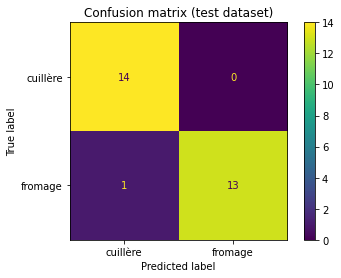

In [87]:
cm = confusion_matrix(yTest, predTest, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
disp.ax_.set_title('Confusion matrix (test dataset)')
plt.show()

# Conclusion
Pour conclure, lors de la moyenne des MFCC, nous avons un résultat
d'apprentissage qui est quasiment similaire à celui des tests (via matrice de confusion).
Pour la partie bof, nous avons obtenu lors des tests un résultat peu statisfaisant. Nous n'avons pas eu le temps de sortir des matrices de confusion pour mieux le représenter.

Comparer les deux méthodes est alors compliqué. Une piste pour améliorer les résultats serait d'utiliser des échantillons sonores mieux découpés (moins de blancs et du bruit).